In [2]:
import cv2
import math
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from keras.preprocessing import image
import numpy as np
from keras.utils import np_utils
from skimage.transform import resize
from PIL import Image
import re
import os
import random
import shutil
import keras
from keras.models import load_model

In [14]:
import tensorflow as tf
from tensorflow import keras


keras.__version__


'2.4.0'

In [15]:
tf.__version__

'2.4.1'

In [3]:
# Loading video names in a column and labels:
os.getcwd()
path='/home/alehof/Sit_to_stand'

videos=os.listdir(path)

label=[]
for i in videos:
    if "incorr" in i:
        label.append(0)
    elif "corr" in i:
        label.append(1)
    else:
        label.append("file_name_incorrect")
        
videos=pd.DataFrame(videos,label).reset_index()
videos.columns=["labels","video_name"]

videos.groupby('labels').count()

,video_name
labels,
0,69
1,69
file_name_incorrect,3


In [4]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [5]:
train_set, test_set = split_train_test(videos, 0.2)

In [11]:
len(test_set)



28

In [10]:
len(train_set)

113

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(videos, test_size=0.2, random_state=42)

ModuleNotFoundError: No module named 'sklearn'

In [9]:
# Splitting the videos into Train and Test Videos:
incorrect=videos.loc[videos["labels"]==0,]
correct=videos.loc[videos["labels"]==1,]

incorrect_range=np.arange(len(incorrect))
correct_range=np.arange(len(correct))
np.random.seed(14)
np.random.shuffle(incorrect_range)
np.random.shuffle(correct_range)

correct=correct.iloc[correct_range,]
incorrect=incorrect.iloc[incorrect_range,]

train_correct=correct.iloc[:49,]
train_incorrect=incorrect.iloc[:49,]
test_correct=correct.iloc[49:,]
test_incorrect=incorrect.iloc[49:,]

train_set=train_correct.append(train_incorrect)
test_set=test_correct.append(test_incorrect)

train_set=train_set.reset_index().drop("index",axis=1)
test_set=test_set.reset_index().drop("index",axis=1)

In [10]:
print(train_set.groupby('labels').count())
print(test_set.groupby('labels').count())

        video_name
labels            
0               49
1               49
        video_name
labels            
0               20
1               20


In [11]:
exercises_dir_path=path
train_videos_dir=os.path.join(path,"Train_Videos")
test_videos_dir=os.path.join(path,"Test_Videos")
try:
    os.mkdir(exercises_dir_path)
except FileExistsError as ae:
    print("Folder Already Created")

try:
    os.mkdir(train_videos_dir)
except FileExistsError as ae:
    print("Folder Already Created")
    
try:
    os.mkdir(test_videos_dir)
except FileExistsError as ae:
    print("Folder Already Created")

Folder Already Created


In [12]:
def video_capturing_function(dataset,folder_name):
    for i in np.arange(len(dataset)):
        video_name=dataset.video_name[i]
        video_read_path=os.path.join(path,video_name)
        cap=cv2.VideoCapture(video_read_path)
        try:
            os.mkdir(os.path.join(os.path.join(path,folder_name),
                                  video_name.split(".")[0]))
        except:
            print("File Already Created")
        
        train_write_file=os.path.join(os.path.join(path,folder_name),
                                  video_name.split(".")[0])
        cap.set(cv2.CAP_PROP_FPS, 20)
        frameRate=cap.get(5)
        x=1
        count=0
        while(cap.isOpened()):
            frameId = cap.get(1) #current frame number
            ret, frame = cap.read()
            if (ret != True):
                break
            print(frameRate / 6)
            if (frameId % math.floor(frameRate / 6) == 0):
                filename ="frame%d.jpg" % count;count+=1
                frame_grey=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                cv2.imwrite(os.path.join(train_write_file,filename), frame_grey)
        cap.release()
    return print("All frames written in the: "+folder_name+" Folder")
    
video_capturing_function(train_set,"Train_Videos")
video_capturing_function(test_set,"Test_Videos")

5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964539005
5.0177304964

5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.0199203187251
5.019920

5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.02673796

5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.01945525

5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.025510204081633
5.020576131687243
5.020576131687243
5.020576131687243
5.020576131687243
5.020576131687243
5.020576131687243
5.020576131687243
5.020576131687243
5.020576131687243
5.020576131687243
5.020576131687243
5.020576131687243
5.020576131687243
5.020576131687243
5.02057613

5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.023148148148148
5.02314814

5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.02347417

5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256410255
5.0256410256

5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.014925373134329
5.01492537

5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.025252525252525
5.02525252

5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.02092050209205
5.020920502092

5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.023474178403756
5.02347417

5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.026455026455026
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.02358490

5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.020491803278689
5.02049180

5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.021186440677966
5.02118644

5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.023041474654378
5.02304147

5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.021834061135372
5.02183406

5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.022935779816514
5.02293577

5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.023584905660377
5.02358490

5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.02164502

5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.023809523809524
5.02380952

5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.02325581

5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.023255813953488
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.012953367875648
5.01295336

5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.01865671

5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.017667844522968
5.01766784

5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999999995
5.0249999999

5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.024038461538462
5.02403846

5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.016025641025641
5.01602564

5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.016778523489933
5.01677852

5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706

5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.016949152542373
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430

5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149797565
5.0202429149

5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837209305
5.0145348837

5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.026737967914438
5.02673796

5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.016556291390729
5.01655629

5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.034965034965035
5.03496503

5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.013623978201635
5.01362397

5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.015243902439024
5.01524390

5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.034722222222222
5.03472222

5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.015015015015015
5.01501501

5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.01779359430605
5.017793594306

5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.016835016835016
5.01683501

5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.015197568389058
5.01519756

5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.018656716417911
5.01865671

5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.016666666666667
5.01666666

5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.012254901960785
5.01225490

5.019762845849802
5.019762845849802
5.019762845849802
5.019762845849802
5.019762845849802
5.019762845849802
5.019762845849802
5.019762845849802
5.019762845849802
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.015576323987539
5.01557632

5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.01628664495114
5.016286644951

5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033613445
5.0210084033

5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.024875621890547
5.02487562

5.026881720430107
5.026881720430107
5.026881720430107
5.026881720430107
5.026881720430107
5.026881720430107
5.026881720430107
5.026881720430107
5.026881720430107
5.026881720430107
5.026881720430107
5.026881720430107
5.026881720430107
5.026881720430107
5.026881720430107
5.026881720430107
5.026881720430107
5.026881720430107
5.026881720430107
5.026881720430107
5.026881720430107
5.026881720430107
5.026881720430107
5.026881720430107
5.026881720430107
5.0200000000000005
5.0200000000000005
5.0200000000000005
5.0200000000000005
5.0200000000000005
5.0200000000000005
5.0200000000000005
5.0200000000000005
5.0200000000000005
5.0200000000000005
5.0200000000000005
5.0200000000000005
5.0200000000000005
5.0200000000000005
5.0200000000000005
5.0200000000000005
5.0200000000000005
5.0200000000000005
5.0200000000000005
5.0200000000000005
5.0200000000000005
5.0200000000000005
5.0200000000000005
5.0200000000000005
5.0200000000000005
5.0200000000000005
5.0200000000000005
5.0200000000000005
5.0200000000000005

5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.023696682464455
5.026315789473684
5.026315789473684
5.026315789473684
5.026315789473684
5.026315789473684
5.026315789473684
5.026315789473684
5.026315789473684
5.026315789473684
5.026315789473684
5.026315789473684
5.026315789473684
5.026315789473684
5.026315789473684
5.026315789473684
5.026315789473684
5.026315789473684
5.026315789473684
5.026315789473684
5.02631578

5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.022026431718062
5.02202643

5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039215685
5.0245098039

5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.024752475247525
5.02475247

5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.020325203252033
5.02032520

5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.021645021645022
5.02164502

5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.019305019305019
5.01930501

5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.018115942028985
5.01811594

5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.011210762331839
5.01121076

5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.014836795252226
5.01483679

5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.020746887966805
5.02074688

5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.019685039370079
5.01968503

5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706624605
5.0157728706

5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.016891891891892
5.01689189

5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859813085
5.0233644859

5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.016233766233767
5.01623376

5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.019455252918288
5.01945525

5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.012787723785166
5.01278772

In [13]:
# Code to see how many frames are captured for each video:
train_dir_path='/home/alehof/Sit_to_stand/Train_Videos'
test_dir_path='/home/alehof/Sit_to_stand/Test_Videos'

vid_file_name=train_set.video_name[0].split('.')[0]

train_frames=[]
for i in np.arange(len(train_set.video_name)):
    vid_file_name=train_set.video_name[i].split('.')[0]
    train_frames.append(len(os.listdir(os.path.join(train_dir_path,vid_file_name))))

test_frames=[]
for i in np.arange(len(test_set.video_name)):
    vid_file_name=test_set.video_name[i].split('.')[0]
    test_frames.append(len(os.listdir(os.path.join(test_dir_path,vid_file_name))))

In [14]:
def frame_generating_function(dataset,dir_path):
    for i in np.arange(len(dataset.video_name)):
        vid_namu=dataset.video_name[i]
        vid_path=os.path.join(dir_path,vid_namu.split(".")[0])
        #print(vid_path)
        len_frame=len(os.listdir(vid_path))
        #print(len_frame)
        #this is an important value (40 i want to utilize 40 frames, maybe i should set this to a constant)
        j=50-len(os.listdir(vid_path))
        #print(j)
        
        if j>0:
            list_frames=os.listdir(vid_path)
            print(list_frames)
            c=0
            for k in np.arange(j):
                list_frames=os.listdir(vid_path)
                print(list_frames)
                #print(list_frames)
                frame=os.path.join(vid_path,list_frames[1])
                #print(frame)
                #get the last frame to be coppied
                #frame=os.path.join(vid_path,list_frames[c])
                #print(frame)
                countu=k+len_frame
                new_frame="frame%d.jpg" % countu
                shutil.copy2(frame,os.path.join(vid_path,new_frame))
                #c+=1
                #omitting this, I intend to only copy the last frame the amount of times i need it and place it at the end.
                
        else:
            pass
    return print("Frame Generation Done!")
    
frame_generating_function(train_set,train_dir_path)
frame_generating_function(test_set,test_dir_path)

['frame2.jpg', 'frame34.jpg', 'frame1.jpg', 'frame23.jpg', 'frame5.jpg', 'frame31.jpg', 'frame32.jpg', 'frame4.jpg', 'frame16.jpg', 'frame29.jpg', 'frame13.jpg', 'frame14.jpg', 'frame27.jpg', 'frame10.jpg', 'frame26.jpg', 'frame9.jpg', 'frame25.jpg', 'frame22.jpg', 'frame19.jpg', 'frame24.jpg', 'frame15.jpg', 'frame21.jpg', 'frame3.jpg', 'frame30.jpg', 'frame8.jpg', 'frame0.jpg', 'frame35.jpg', 'frame12.jpg', 'frame17.jpg', 'frame6.jpg', 'frame7.jpg', 'frame37.jpg', 'frame28.jpg', 'frame20.jpg', 'frame36.jpg', 'frame33.jpg', 'frame11.jpg', 'frame18.jpg']
['frame2.jpg', 'frame34.jpg', 'frame1.jpg', 'frame23.jpg', 'frame5.jpg', 'frame31.jpg', 'frame32.jpg', 'frame4.jpg', 'frame16.jpg', 'frame29.jpg', 'frame13.jpg', 'frame14.jpg', 'frame27.jpg', 'frame10.jpg', 'frame26.jpg', 'frame9.jpg', 'frame25.jpg', 'frame22.jpg', 'frame19.jpg', 'frame24.jpg', 'frame15.jpg', 'frame21.jpg', 'frame3.jpg', 'frame30.jpg', 'frame8.jpg', 'frame0.jpg', 'frame35.jpg', 'frame12.jpg', 'frame17.jpg', 'frame6.jpg

['frame2.jpg', 'frame34.jpg', 'frame40.jpg', 'frame1.jpg', 'frame23.jpg', 'frame5.jpg', 'frame39.jpg', 'frame41.jpg', 'frame31.jpg', 'frame32.jpg', 'frame4.jpg', 'frame46.jpg', 'frame38.jpg', 'frame16.jpg', 'frame29.jpg', 'frame13.jpg', 'frame14.jpg', 'frame27.jpg', 'frame10.jpg', 'frame43.jpg', 'frame26.jpg', 'frame9.jpg', 'frame25.jpg', 'frame22.jpg', 'frame19.jpg', 'frame24.jpg', 'frame15.jpg', 'frame21.jpg', 'frame3.jpg', 'frame30.jpg', 'frame8.jpg', 'frame0.jpg', 'frame35.jpg', 'frame12.jpg', 'frame17.jpg', 'frame6.jpg', 'frame7.jpg', 'frame37.jpg', 'frame28.jpg', 'frame20.jpg', 'frame36.jpg', 'frame33.jpg', 'frame11.jpg', 'frame42.jpg', 'frame45.jpg', 'frame44.jpg', 'frame18.jpg']
['frame2.jpg', 'frame34.jpg', 'frame40.jpg', 'frame1.jpg', 'frame23.jpg', 'frame5.jpg', 'frame39.jpg', 'frame41.jpg', 'frame31.jpg', 'frame32.jpg', 'frame4.jpg', 'frame46.jpg', 'frame38.jpg', 'frame16.jpg', 'frame29.jpg', 'frame13.jpg', 'frame14.jpg', 'frame27.jpg', 'frame10.jpg', 'frame43.jpg', 'frame2

In [9]:
# some troubles detected, folder incorrect respectively correct is created but no files placed, that is why error index out of range occurs,
# can be overcome if another exercise is copied in the respective folder

In [15]:
# Train and Validation Splitting:
label_1_dat=train_set.loc[train_set["labels"]==1,]
label_0_dat=train_set.loc[train_set["labels"]==0,]

train_len_label1=math.floor(len(label_1_dat)*0.9)
train_len_label0=math.floor(len(label_0_dat)*0.9)

train_dat_label1=label_1_dat.iloc[:train_len_label1,]
train_dat_label0=label_0_dat.iloc[:train_len_label0,]

validation_dat_label1=label_1_dat.iloc[train_len_label1:,]
validation_dat_label0=label_0_dat.iloc[train_len_label0:,]

train_vid_dat=train_dat_label1.append(train_dat_label0,ignore_index=True)
validation_vid_dat=validation_dat_label1.append(validation_dat_label0,ignore_index=True)

In [16]:
# Data load function for 10 frames:

def data_load_function_10frames(dataset,directory):
    frames=[]
    for i in np.arange(len(dataset)):
        vid_name=dataset.video_name[i].split(".")[0]
        vid_dir_path=os.path.join(directory,vid_name)
        frames_to_select=[]
        for l in np.arange(0,10):
            frames_to_select.append('frame%d.jpg' % l)
        vid_data=[]
        for frame in frames_to_select:
            image=Image.open(os.path.join(vid_dir_path,frame))
            image=image.resize((250, 250), Image.ANTIALIAS) 
            datu=np.asarray(image)
            normu_dat=datu/255
            vid_data.append(normu_dat)
        vid_data=np.array(vid_data)
        frames.append(vid_data)
    return np.array(frames)

In [17]:
# 10 frames train,validation and test data:

test_dataset_new=data_load_function_10frames(test_set,test_dir_path)
train_dataset_new=data_load_function_10frames(train_vid_dat,train_dir_path)
validation_dataset_new=data_load_function_10frames(validation_vid_dat,train_dir_path)

test_labels=np.array(test_set.labels)
train_labels=np.array(train_vid_dat.labels)
validation_labels=np.array(validation_vid_dat.labels)

In [18]:
# Reshaping tensors to confirm with the model we are going to train:
test_dataset_new=test_dataset_new.reshape((40,10,250,250,1))
train_dataset_new=train_dataset_new.reshape((88,10,250,250,1))
validation_dataset_new=validation_dataset_new.reshape((10,10,250,250,1))
print(train_dataset_new)
print(train_labels)

[[[[[0.85098039]
    [0.83529412]
    [0.76078431]
    ...
    [0.97254902]
    [0.96862745]
    [0.96078431]]

   [[0.84705882]
    [0.83921569]
    [0.76862745]
    ...
    [0.96862745]
    [0.96862745]
    [0.96862745]]

   [[0.84705882]
    [0.84313725]
    [0.76862745]
    ...
    [0.96470588]
    [0.96470588]
    [0.96862745]]

   ...

   [[0.73333333]
    [0.7372549 ]
    [0.74509804]
    ...
    [0.63137255]
    [0.61960784]
    [0.62745098]]

   [[0.73333333]
    [0.7372549 ]
    [0.74509804]
    ...
    [0.63921569]
    [0.64313725]
    [0.63529412]]

   [[0.73333333]
    [0.7372549 ]
    [0.74117647]
    ...
    [0.63921569]
    [0.64313725]
    [0.63921569]]]


  [[[0.85490196]
    [0.83921569]
    [0.76078431]
    ...
    [0.96862745]
    [0.95294118]
    [0.96078431]]

   [[0.85098039]
    [0.83921569]
    [0.76470588]
    ...
    [0.96862745]
    [0.96078431]
    [0.96862745]]

   [[0.85098039]
    [0.84313725]
    [0.76470588]
    ...
    [0.96470588]
    [0.96470588]
 

In [19]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset_new = train_dataset_new.cache().prefetch(buffer_size=AUTOTUNE)
val_dataset_new=val_dataset_new.cache().prefetch(buffer_size=AUTOTUNE)

NameError: name 'tf' is not defined

In [14]:
## important to consider exercise numbers, as above 80 % of training will stay training data
## 20 % will become validation data 
## therefore considering the 140 videos i had
## i had 98 in training data folder. and 42 in test data folder
## 98 * 0,2 = 20 rounded, + 98*0,8 = 78 rounded (math floor), now it matches up.

## new try with 90% - 10 %

# 88 and 10

In [20]:
baseline_predictions=np.ones(len(test_labels))
test_accuracy_naive=np.where(baseline_predictions==test_labels)[0].shape[0]/len(test_labels)
test_accuracy_naive

0.5

In [16]:
#now standard simple CNN and LSTM basic architecture


In [21]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
model_cnlst = models.Sequential()
model_cnlst.add(TimeDistributed(Conv2D(128, (3, 3), strides=(1,1),activation='relu'),input_shape=(10, 250, 250, 1)))
model_cnlst.add(TimeDistributed(Conv2D(64, (3, 3), strides=(1,1),activation='relu')))
model_cnlst.add(TimeDistributed(MaxPooling2D(2,2)))
model_cnlst.add(TimeDistributed(Conv2D(64, (3, 3), strides=(1,1),activation='relu')))
model_cnlst.add(TimeDistributed(Conv2D(32, (3, 3), strides=(1,1),activation='relu')))
model_cnlst.add(TimeDistributed(MaxPooling2D(2,2)))
model_cnlst.add(TimeDistributed(BatchNormalization()))


model_cnlst.add(TimeDistributed(Flatten()))
model_cnlst.add(Dropout(0.2))

model_cnlst.add(LSTM(32,return_sequences=False,dropout=0.2)) # used 32 units

model_cnlst.add(Dense(64,activation='relu'))
model_cnlst.add(Dense(32,activation='relu'))
model_cnlst.add(Dropout(0.2))
model_cnlst.add(Dense(1, activation='sigmoid'))
model_cnlst.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 10, 248, 248, 128) 1280      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 10, 246, 246, 64)  73792     
_________________________________________________________________
time_distributed_2 (TimeDist (None, 10, 123, 123, 64)  0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 10, 121, 121, 64)  36928     
_________________________________________________________________
time_distributed_4 (TimeDist (None, 10, 119, 119, 32)  18464     
_________________________________________________________________
time_distributed_5 (TimeDist (None, 10, 59, 59, 32)    0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 10, 59, 59, 32)    1

In [22]:
# 'cnn_lstm_model_new5.h5'
from keras import optimizers
callbacks_list_cnlst=[keras.callbacks.EarlyStopping(
monitor='acc',patience=3),
               keras.callbacks.ModelCheckpoint(
               filepath='cnn_lstm_model_new2.h5',
               monitor='val_loss',
               save_best_only=True),
                keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 5)
               ]

from keras import optimizers
optimizer_new=optimizers.RMSprop(lr=0.01)
model_cnlst.compile(optimizer=optimizer_new,loss='binary_crossentropy',metrics=['acc'])

In [24]:
train_dataset_new=np.asarray(train_dataset_new).astype(np.float32)
train_labels=np.asarray(train_labels).astype(np.float32)
validation_dataset_new=np.asarray(validation_dataset_new).astype(np.float32)
validation_labels=np.asarray(validation_labels).astype(np.float32)

In [ ]:
history_new_cnlst=model_cnlst.fit(train_dataset_new,train_labels,epochs=20,batch_size=10,
               validation_data=(validation_dataset_new,validation_labels),
               callbacks=callbacks_list_cnlst)

Epoch 1/20


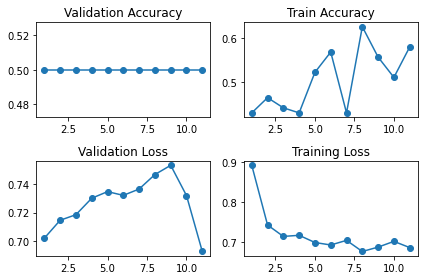

In [21]:
acc=history_new_cnlst.history["acc"]
val_acc=history_new_cnlst.history["val_acc"]
loss=history_new_cnlst.history["loss"]
val_loss=history_new_cnlst.history["val_loss"]
epochs=np.arange(1,12)

plt.figure()
plt.subplot(2,2,1)
plt.plot(epochs,val_acc,'-o')
plt.title('Validation Accuracy')

plt.subplot(2,2,2)
plt.plot(epochs,acc,'-o')
plt.title('Train Accuracy')

plt.subplot(2,2,3)
plt.plot(epochs,val_loss,'-o')
plt.title('Validation Loss')

plt.subplot(2,2,4)
plt.plot(epochs,loss,'-o')
plt.title('Training Loss')


plt.tight_layout()

In [22]:
test_dataset_new=np.asarray(test_dataset_new).astype(np.float32)
test_labels=np.asarray(test_labels).astype(np.float32)

In [ ]:
modelu_5=load_model('cnn_lstm_model_new2.h5')
modelu_5.evaluate(test_dataset_new,test_labels)

In [5]:
model_cnlst = models.Sequential()
model_cnlst.add(TimeDistributed(Conv2D(128, (3, 3), strides=(1,1),activation='relu'),input_shape=(10, 250, 250, 1)))
model_cnlst.add(TimeDistributed(Conv2D(64, (3, 3), strides=(1,1),activation='relu')))
model_cnlst.add(TimeDistributed(MaxPooling2D(2,2)))
model_cnlst.add(TimeDistributed(Conv2D(64, (3, 3), strides=(1,1),activation='relu')))
model_cnlst.add(TimeDistributed(Conv2D(32, (3, 3), strides=(1,1),activation='relu')))
model_cnlst.add(TimeDistributed(BatchNormalization()))
model_cnlst.add(TimeDistributed(MaxPooling2D(2,2)))

model_cnlst.add(TimeDistributed(Conv2D(64, (3, 3), strides=(1,1),activation='relu')))
model_cnlst.add(TimeDistributed(Conv2D(32, (3, 3), strides=(1,1),activation='relu')))
model_cnlst.add(TimeDistributed(MaxPooling2D(2,2)))
model_cnlst.add(TimeDistributed(Conv2D(64, (3, 3), strides=(1,1),activation='relu')))
model_cnlst.add(TimeDistributed(Conv2D(32, (3, 3), strides=(1,1),activation='relu')))
model_cnlst.add(TimeDistributed(MaxPooling2D(2,2)))
model_cnlst.add(TimeDistributed(BatchNormalization()))
model_cnlst.add(TimeDistributed(Flatten()))
model_cnlst.add(Dropout(0.2))

model_cnlst.add(LSTM(64,return_sequences=False,dropout=0.2)) # used 32 units
model_cnlst.add(Dense(128,activation='relu'))
model_cnlst.add(BatchNormalization())
model_cnlst.add(Dense(64,activation='relu'))
model_cnlst.add(Dense(32,activation='relu'))
model_cnlst.add(Dropout(0.2))
model_cnlst.add(Dense(1, activation='sigmoid'))
model_cnlst.summary()

NameError: name 'models' is not defined

In [3]:
callbacks_list_cnlst=[keras.callbacks.EarlyStopping(
monitor='acc',patience=3),
               keras.callbacks.ModelCheckpoint(
               filepath='cnn_lstm_model_new4.h5',
               monitor='val_loss',
               save_best_only=True),
                keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 3)
               ]

from keras import optimizers
optimizer_new=optimizers.RMSprop(lr=0.01)
model_cnlst.compile(optimizer=optimizer_new,loss='binary_crossentropy',metrics=['acc'])

NameError: name 'keras' is not defined

In [33]:
history=model_cnlst.fit(train_dataset_new,train_labels,batch_size=10,epochs=20,
                        validation_data=(validation_dataset_new,validation_labels),
                       callbacks=callbacks_list_cnlst)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).